In [26]:
import numpy as np 
import json as json
import glob as glob
import zipfile as zipfile
import json as json
from nltk.tokenize import word_tokenize
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import textblob
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE
import patsy

In [27]:
pd.set_option('display.max_colwidth', -1)

pd.set_option('display.max_rows', 1000)

In [28]:
category = pd.read_csv('categories_titles.csv',error_bad_lines=False)
# clean_votes = pd.read_csv('clean_votes.csv',error_bad_lines=False)
country_code=pd.read_csv('country_codes_final.csv',error_bad_lines=False)

In [29]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563090 entries, 0 to 563089
Data columns (total 8 columns):
symbol      563090 non-null object
title       563090 non-null object
descr1      563090 non-null object
category    563090 non-null object
year        563090 non-null int64
voted       563090 non-null object
country     563090 non-null object
date        563090 non-null object
dtypes: int64(1), object(7)
memory usage: 34.4+ MB


In [30]:
# clean_votes['country'].unique()

In [31]:
# country_code['country']=country_code['country'].apply(lambda x: x.upper())
# country_code.to_csv(path_or_buf="/Users/uncontract/Documents/UN_data/UN_Resolution/PART2/country_codes_capital.csv", index=False)

In [32]:
# data1=pd.merge(country_code, clean_votes, on=['country'])

In [33]:
category['country'].nunique()

201

In [34]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563090 entries, 0 to 563089
Data columns (total 8 columns):
symbol      563090 non-null object
title       563090 non-null object
descr1      563090 non-null object
category    563090 non-null object
year        563090 non-null int64
voted       563090 non-null object
country     563090 non-null object
date        563090 non-null object
dtypes: int64(1), object(7)
memory usage: 34.4+ MB


In [35]:
data2=pd.merge(category, country_code, on=['country']);
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551784 entries, 0 to 551783
Data columns (total 10 columns):
symbol      551784 non-null object
title       551784 non-null object
descr1      551784 non-null object
category    551784 non-null object
year        551784 non-null int64
voted       551784 non-null object
country     551784 non-null object
date        551784 non-null object
a2          551784 non-null object
a3          551784 non-null object
dtypes: int64(1), object(9)
memory usage: 46.3+ MB


In [36]:
data2['country'].nunique()

197

In [37]:
def coded_voted(voted):
    for x in voted:
        if voted=='Y':
            return 1
        if voted=='N':
            return -1
        if voted =='A':
            return 0
        
data2['code_vote']=data2['voted'].map(coded_voted)

In [38]:
data2['code_vote'].value_counts()

 1    459101
 0    64432 
-1    28251 
Name: code_vote, dtype: int64

In [39]:
data=data2[['country', 'code_vote','descr1']]

In [40]:
df=data.groupby(['country', 'descr1'])['code_vote'].aggregate('mean').unstack()
df.reset_index()


descr1,country,1995reviewandextensionconferenceofstatespartiestothetreatyonthenonproliferationofnuclearweapons,1995reviewandextensionconferenceofthepartiestothetreatyonthenonproliferationofnuclearweapons,2000reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweapons,2005reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweaponsanditspreparatorycommittee,2010reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweaponsanditspreparatorycommittee,2015reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweaponsanditspreparatorycommittee,2020reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweaponsanditspreparatorycommittee,academicculturalandsportsboycottsofsouthafrica,acceleratingimplementationofnucleardisarmamentcommitments,...,workinggroupofthecommissiononhumanrightstoelaborateadraftdeclarationinaccordancewithparagraph5ofgeneralassemblyresolution49214of23december1994,workingtowardstheeliminationofcrimesagainstwomencommittedinthenameofhonour,workofthecommitteeontheexerciseoftheinalienablerightsofthepalestinianpeople,workofthespecialcommitteetoinvestigateisraelipracticesaffectingthehumanrightsofthepalestinianpeopleandotherarabsoftheoccupiedterritories,workofthespecialcommitteetoinvestigateisraelpracticesaffectingthehumanrightsofthepalestinianpeopleandotherarabsoftheoccupiedterritories,worldconferenceonsanctionsagainstracistsouthafrica,worlddisarmamentcampaign,worldsocialsituation,worldwideactionforcollectingsignaturesinsupportofmeasurestopreventnuclearwartocurbthearmsraceandfordisarmament,zoneofpeaceandcooperationofthesouthatlantic
0,AFGHANISTAN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.809524,1.0,1.0,1.000000,1.000000,1.0,0.533333
1,ALBANIA,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.000000,0.0,1.0,1.000000,1.000000,NaN,1.000000
2,ALGERIA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.000000,1.0,1.0,1.000000,1.000000,NaN,1.000000
3,ANDORRA,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,0.0,1.0,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,1.000000
4,ANGOLA,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,...,1.0,1.0,1.0,0.875000,1.0,1.0,1.000000,1.000000,1.0,1.000000
5,ANTIGUA AND BARBUDA,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,...,1.0,1.0,NaN,0.842105,1.0,1.0,1.000000,1.000000,NaN,1.000000
6,ARGENTINA,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.000000,0.0,1.0,0.777778,1.000000,0.0,1.000000
7,ARMENIA,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,0.0,1.0,NaN,0.619048,1.0,NaN,NaN,NaN,NaN,1.000000
8,AUSTRALIA,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,-1.0,-0.666667,-1.0,1.0,0.888889,0.500000,0.0,1.000000
9,AUSTRIA,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.047619,0.0,0.0,0.555556,0.500000,0.0,1.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, AFGHANISTAN to ZIMBABWE
Columns: 930 entries, 1995reviewandextensionconferenceofstatespartiestothetreatyonthenonproliferationofnuclearweapons to zoneofpeaceandcooperationofthesouthatlantic
dtypes: float64(930)
memory usage: 1.4+ MB


In [42]:
df['missing']=df.apply(lambda x: x.count(), axis=1)

df['missing_diff']=df['missing'].apply(lambda x: (x-930))

df['missing_diff'].sum()/(930*197)

-0.1966595709841166

In [43]:
data_missing=df[df['missing']>400]

data_missing['missing_diff'].sum()/(930*175)

-0.12736712749615975

In [21]:
data_missing

descr1,1995reviewandextensionconferenceofstatespartiestothetreatyonthenonproliferationofnuclearweapons,1995reviewandextensionconferenceofthepartiestothetreatyonthenonproliferationofnuclearweapons,2000reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweapons,2005reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweaponsanditspreparatorycommittee,2010reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweaponsanditspreparatorycommittee,2015reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweaponsanditspreparatorycommittee,2020reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweaponsanditspreparatorycommittee,academicculturalandsportsboycottsofsouthafrica,acceleratingimplementationofnucleardisarmamentcommitments,accessbystaffrepresentativestothe5thcommittee,...,workofthecommitteeontheexerciseoftheinalienablerightsofthepalestinianpeople,workofthespecialcommitteetoinvestigateisraelipracticesaffectingthehumanrightsofthepalestinianpeopleandotherarabsoftheoccupiedterritories,workofthespecialcommitteetoinvestigateisraelpracticesaffectingthehumanrightsofthepalestinianpeopleandotherarabsoftheoccupiedterritories,worldconferenceonsanctionsagainstracistsouthafrica,worlddisarmamentcampaign,worldsocialsituation,worldwideactionforcollectingsignaturesinsupportofmeasurestopreventnuclearwartocurbthearmsraceandfordisarmament,zoneofpeaceandcooperationofthesouthatlantic,missing,missing_diff
country,,,,,,,,,,,,,,,,,,,,,
BOSNIA AND HERZEGOVINA,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0,NaN,...,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,1.0,383,-547
CZECHIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,111,-819
DEMOCRATIC KAMPUCHEA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,199,-731
ERITREA,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,...,NaN,0.687500,1.0,NaN,NaN,NaN,NaN,1.0,361,-569
KIRIBATI,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,122,-808
KYRGYZSTAN,0.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,0.647059,1.0,NaN,NaN,NaN,NaN,1.0,363,-567
LAOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,220,-710
MOLDOVA,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,117,-813
MONTENEGRO,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,217,-713


In [19]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, AFGHANISTAN to ZIMBABWE
Columns: 932 entries, 1995reviewandextensionconferenceofstatespartiestothetreatyonthenonproliferationofnuclearweapons to missing_diff
dtypes: float64(930), int64(2)
memory usage: 1.2+ MB


In [20]:
data_set=data_missing.reset_index()

In [21]:
data_set['country']

0      AFGHANISTAN                              
1      ALBANIA                                  
2      ALGERIA                                  
3      ANDORRA                                  
4      ANGOLA                                   
5      ANTIGUA AND BARBUDA                      
6      ARGENTINA                                
7      ARMENIA                                  
8      AUSTRALIA                                
9      AUSTRIA                                  
10     AZERBAIJAN                               
11     BAHAMAS                                  
12     BAHRAIN                                  
13     BANGLADESH                               
14     BARBADOS                                 
15     BELARUS                                  
16     BELGIUM                                  
17     BELIZE                                   
18     BENIN                                    
19     BHUTAN                                   
20     BOLIVIA      

In [22]:
data_cluster=data_missing.iloc[:, :-2]

data_cluster

descr1,1995reviewandextensionconferenceofstatespartiestothetreatyonthenonproliferationofnuclearweapons,1995reviewandextensionconferenceofthepartiestothetreatyonthenonproliferationofnuclearweapons,2000reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweapons,2005reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweaponsanditspreparatorycommittee,2010reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweaponsanditspreparatorycommittee,2015reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweaponsanditspreparatorycommittee,2020reviewconferenceofthepartiestothetreatyonthenonproliferationofnuclearweaponsanditspreparatorycommittee,academicculturalandsportsboycottsofsouthafrica,acceleratingimplementationofnucleardisarmamentcommitments,accessbystaffrepresentativestothe5thcommittee,...,workinggroupofthecommissiononhumanrightstoelaborateadraftdeclarationinaccordancewithparagraph5ofgeneralassemblyresolution49214of23december1994,workingtowardstheeliminationofcrimesagainstwomencommittedinthenameofhonour,workofthecommitteeontheexerciseoftheinalienablerightsofthepalestinianpeople,workofthespecialcommitteetoinvestigateisraelipracticesaffectingthehumanrightsofthepalestinianpeopleandotherarabsoftheoccupiedterritories,workofthespecialcommitteetoinvestigateisraelpracticesaffectingthehumanrightsofthepalestinianpeopleandotherarabsoftheoccupiedterritories,worldconferenceonsanctionsagainstracistsouthafrica,worlddisarmamentcampaign,worldsocialsituation,worldwideactionforcollectingsignaturesinsupportofmeasurestopreventnuclearwartocurbthearmsraceandfordisarmament,zoneofpeaceandcooperationofthesouthatlantic
country,,,,,,,,,,,,,,,,,,,,,
AFGHANISTAN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,0.809524,1.0,1.0,1.000000,1.000000,1.0,0.533333
ALBANIA,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,...,0.0,1.0,1.0,0.000000,0.0,1.0,1.000000,1.000000,NaN,1.000000
ALGERIA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.000000,1.0,1.0,1.000000,1.000000,NaN,1.000000
ANDORRA,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,...,0.0,1.0,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,1.000000
ANGOLA,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,...,1.0,1.0,1.0,0.875000,1.0,1.0,1.000000,1.000000,1.0,1.000000
ANTIGUA AND BARBUDA,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,...,1.0,1.0,NaN,0.842105,1.0,1.0,1.000000,1.000000,NaN,1.000000
ARGENTINA,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.000000,0.0,1.0,0.777778,1.000000,0.0,1.000000
ARMENIA,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,...,0.0,1.0,NaN,0.619048,1.0,NaN,NaN,NaN,NaN,1.000000
AUSTRALIA,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,-1.0,-0.666667,-1.0,1.0,0.888889,0.500000,0.0,1.000000


In [23]:
df=data_cluster.reset_index(drop=True)



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Columns: 930 entries, 1995reviewandextensionconferenceofstatespartiestothetreatyonthenonproliferationofnuclearweapons to zoneofpeaceandcooperationofthesouthatlantic
dtypes: float64(930)
memory usage: 1.2 MB


In [25]:
X=data_cluster.as_matrix().astype(float)

In [26]:
X_incomplete = X.copy()

In [27]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE,MatrixFactorization

X_filled_nnm = MatrixFactorization().complete(X_incomplete)

Train on 127818 samples, validate on 14203 samples
Epoch 1/10000
 - 0s - loss: 1.0999 - val_loss: 1.1252
Epoch 2/10000
 - 0s - loss: 1.0978 - val_loss: 1.1239
Epoch 3/10000
 - 0s - loss: 1.0959 - val_loss: 1.1229
Epoch 4/10000
 - 0s - loss: 1.0945 - val_loss: 1.1219
Epoch 5/10000
 - 0s - loss: 1.0931 - val_loss: 1.1209
Epoch 6/10000
 - 0s - loss: 1.0917 - val_loss: 1.1199
Epoch 7/10000
 - 0s - loss: 1.0902 - val_loss: 1.1189
Epoch 8/10000
 - 0s - loss: 1.0887 - val_loss: 1.1178
Epoch 9/10000
 - 0s - loss: 1.0872 - val_loss: 1.1167
Epoch 10/10000
 - 0s - loss: 1.0856 - val_loss: 1.1156
Epoch 11/10000
 - 0s - loss: 1.0841 - val_loss: 1.1145
Epoch 12/10000
 - 0s - loss: 1.0825 - val_loss: 1.1134
Epoch 13/10000
 - 0s - loss: 1.0809 - val_loss: 1.1123
Epoch 14/10000
 - 0s - loss: 1.0793 - val_loss: 1.1112
Epoch 15/10000
 - 0s - loss: 1.0777 - val_loss: 1.1100
Epoch 16/10000
 - 0s - loss: 1.0760 - val_loss: 1.1089
Epoch 17/10000
 - 0s - loss: 1.0744 - val_loss: 1.1077
Epoch 18/10000
 - 0s - 

Epoch 149/10000
 - 0s - loss: 0.8526 - val_loss: 0.9245
Epoch 150/10000
 - 0s - loss: 0.8506 - val_loss: 0.9227
Epoch 151/10000
 - 0s - loss: 0.8486 - val_loss: 0.9209
Epoch 152/10000
 - 0s - loss: 0.8466 - val_loss: 0.9191
Epoch 153/10000
 - 0s - loss: 0.8445 - val_loss: 0.9173
Epoch 154/10000
 - 0s - loss: 0.8425 - val_loss: 0.9154
Epoch 155/10000
 - 0s - loss: 0.8405 - val_loss: 0.9136
Epoch 156/10000
 - 0s - loss: 0.8384 - val_loss: 0.9118
Epoch 157/10000
 - 0s - loss: 0.8364 - val_loss: 0.9100
Epoch 158/10000
 - 0s - loss: 0.8344 - val_loss: 0.9082
Epoch 159/10000
 - 0s - loss: 0.8324 - val_loss: 0.9063
Epoch 160/10000
 - 0s - loss: 0.8303 - val_loss: 0.9045
Epoch 161/10000
 - 0s - loss: 0.8283 - val_loss: 0.9027
Epoch 162/10000
 - 0s - loss: 0.8263 - val_loss: 0.9009
Epoch 163/10000
 - 0s - loss: 0.8243 - val_loss: 0.8991
Epoch 164/10000
 - 0s - loss: 0.8222 - val_loss: 0.8973
Epoch 165/10000
 - 0s - loss: 0.8202 - val_loss: 0.8955
Epoch 166/10000
 - 0s - loss: 0.8182 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6234 - val_loss: 0.7305
Epoch 297/10000
 - 0s - loss: 0.6224 - val_loss: 0.7297
Epoch 298/10000
 - 0s - loss: 0.6213 - val_loss: 0.7289
Epoch 299/10000
 - 0s - loss: 0.6203 - val_loss: 0.7281
Epoch 300/10000
 - 0s - loss: 0.6193 - val_loss: 0.7274
Epoch 301/10000
 - 0s - loss: 0.6183 - val_loss: 0.7266
Epoch 302/10000
 - 0s - loss: 0.6172 - val_loss: 0.7258
Epoch 303/10000
 - 0s - loss: 0.6162 - val_loss: 0.7250
Epoch 304/10000
 - 0s - loss: 0.6152 - val_loss: 0.7242
Epoch 305/10000
 - 0s - loss: 0.6142 - val_loss: 0.7235
Epoch 306/10000
 - 0s - loss: 0.6132 - val_loss: 0.7227
Epoch 307/10000
 - 0s - loss: 0.6122 - val_loss: 0.7219
Epoch 308/10000
 - 0s - loss: 0.6112 - val_loss: 0.7212
Epoch 309/10000
 - 0s - loss: 0.6102 - val_loss: 0.7204
Epoch 310/10000
 - 0s - loss: 0.6092 - val_loss: 0.7197
Epoch 311/10000
 - 0s - loss: 0.6082 - val_loss: 0.7189
Epoch 312/10000
 - 0s - loss: 0.6073 - val_loss: 0.7182
Epoch 313/10000
 - 0s - loss: 0.6063 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4969 - val_loss: 0.6336
Epoch 444/10000
 - 0s - loss: 0.4962 - val_loss: 0.6330
Epoch 445/10000
 - 0s - loss: 0.4955 - val_loss: 0.6325
Epoch 446/10000
 - 0s - loss: 0.4948 - val_loss: 0.6319
Epoch 447/10000
 - 0s - loss: 0.4941 - val_loss: 0.6314
Epoch 448/10000
 - 0s - loss: 0.4934 - val_loss: 0.6308
Epoch 449/10000
 - 0s - loss: 0.4927 - val_loss: 0.6303
Epoch 450/10000
 - 0s - loss: 0.4920 - val_loss: 0.6298
Epoch 451/10000
 - 0s - loss: 0.4913 - val_loss: 0.6292
Epoch 452/10000
 - 0s - loss: 0.4906 - val_loss: 0.6287
Epoch 453/10000
 - 0s - loss: 0.4900 - val_loss: 0.6282
Epoch 454/10000
 - 0s - loss: 0.4893 - val_loss: 0.6276
Epoch 455/10000
 - 0s - loss: 0.4886 - val_loss: 0.6271
Epoch 456/10000
 - 0s - loss: 0.4879 - val_loss: 0.6266
Epoch 457/10000
 - 0s - loss: 0.4872 - val_loss: 0.6260
Epoch 458/10000
 - 0s - loss: 0.4866 - val_loss: 0.6255
Epoch 459/10000
 - 0s - loss: 0.4859 - val_loss: 0.6250
Epoch 460/10000
 - 0s - loss: 0.4852 - val_loss:

Epoch 590/10000
 - 0s - loss: 0.4158 - val_loss: 0.5725
Epoch 591/10000
 - 0s - loss: 0.4154 - val_loss: 0.5723
Epoch 592/10000
 - 0s - loss: 0.4150 - val_loss: 0.5720
Epoch 593/10000
 - 0s - loss: 0.4146 - val_loss: 0.5717
Epoch 594/10000
 - 0s - loss: 0.4142 - val_loss: 0.5714
Epoch 595/10000
 - 0s - loss: 0.4137 - val_loss: 0.5711
Epoch 596/10000
 - 0s - loss: 0.4133 - val_loss: 0.5708
Epoch 597/10000
 - 0s - loss: 0.4129 - val_loss: 0.5705
Epoch 598/10000
 - 0s - loss: 0.4125 - val_loss: 0.5703
Epoch 599/10000
 - 0s - loss: 0.4121 - val_loss: 0.5700
Epoch 600/10000
 - 0s - loss: 0.4117 - val_loss: 0.5697
Epoch 601/10000
 - 0s - loss: 0.4113 - val_loss: 0.5694
Epoch 602/10000
 - 0s - loss: 0.4109 - val_loss: 0.5691
Epoch 603/10000
 - 0s - loss: 0.4105 - val_loss: 0.5689
Epoch 604/10000
 - 0s - loss: 0.4101 - val_loss: 0.5686
Epoch 605/10000
 - 0s - loss: 0.4097 - val_loss: 0.5683
Epoch 606/10000
 - 0s - loss: 0.4093 - val_loss: 0.5681
Epoch 607/10000
 - 0s - loss: 0.4089 - val_loss:

In [28]:
X_filled_nnme

array([[ 1.        ,  1.        ,  0.        , ...,  1.        ,
         1.        ,  0.53333333],
       [-1.        ,  1.        ,  1.        , ...,  1.        ,
         0.74360951,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         0.71753694,  1.        ],
       ..., 
       [ 0.54367349,  0.97418798,  0.9820682 , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         0.48893009,  1.        ]])

In [29]:
df_impute=pd.DataFrame(X_filled_nnm)

df_impute

,0,1,2,3,4,5,6,7,8,9,...,920,921,922,923,924,925,926,927,928,929
0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,0.809524,1.000000,1.000000,1.000000,1.000000,1.000000,0.533333
1,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-0.311161,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.743610,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.717537,1.000000
3,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.490446,1.000000,0.729309,...,0.000000,1.000000,0.227205,0.000000,0.000000,0.492695,0.572747,0.658019,0.071323,1.000000
4,0.802531,0.972271,1.000000,1.000000,1.000000,1.000000,0.981885,1.000000,1.000000,0.222214,...,1.000000,1.000000,1.000000,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,0.926917,1.000000,1.000000,1.000000,0.870858,1.000000,0.919037,...,1.000000,1.000000,0.786980,0.842105,1.000000,1.000000,1.000000,1.000000,0.478462,1.000000
6,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.777778,1.000000,0.000000,1.000000
7,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.853548,1.000000,0.477163,...,0.000000,1.000000,0.717103,0.619048,1.000000,0.792053,0.900129,0.794454,0.557514,1.000000
8,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,-1.000000,-0.666667,-1.000000,1.000000,0.888889,0.500000,0.000000,1.000000
9,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.047619,0.000000,0.000000,0.555556,0.500000,0.000000,1.000000


In [30]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df_impute)

In [31]:
covMat = np.cov(X_scaled.T)


In [32]:
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [33]:
print (len(eigenValues))
print (len(eigenVectors))

930
930


In [34]:
# print (eigenValues)

In [35]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

# print(varExpl)

In [36]:
cvarex = np.cumsum(varExpl);
cvarex[:50]

array([ 38.41584311+0.j,  51.15712935+0.j,  59.49668123+0.j,
        63.49916445+0.j,  66.76376180+0.j,  68.88353147+0.j,
        70.58129266+0.j,  72.02102802+0.j,  73.25426013+0.j,
        74.35736539+0.j,  75.41841662+0.j,  76.42195752+0.j,
        77.32666264+0.j,  78.13314773+0.j,  78.86121497+0.j,
        79.50300927+0.j,  80.08704661+0.j,  80.65030682+0.j,
        81.19036686+0.j,  81.68505517+0.j,  82.17443054+0.j,
        82.64267034+0.j,  83.10178591+0.j,  83.52458608+0.j,
        83.93381231+0.j,  84.33642647+0.j,  84.71242965+0.j,
        85.08114980+0.j,  85.43248811+0.j,  85.77643052+0.j,
        86.11081416+0.j,  86.43755100+0.j,  86.75526627+0.j,
        87.06379209+0.j,  87.35647087+0.j,  87.64402930+0.j,
        87.91578895+0.j,  88.18207338+0.j,  88.43481858+0.j,
        88.68661694+0.j,  88.93169308+0.j,  89.16324593+0.j,
        89.39391370+0.j,  89.62219254+0.j,  89.84944465+0.j,
        90.06685723+0.j,  90.28066743+0.j,  90.48938291+0.j,
        90.68785460+0.j,

In [37]:
from sklearn.decomposition import PCA 

pcask = PCA(n_components=50)
print (pcask.fit(X_scaled).components_) # See the eigenvectors
xPC = pcask.fit_transform(X_scaled) 

[[ -4.05152784e-02  -9.49977891e-03  -1.36015757e-03 ...,  -4.69266620e-02
   -2.70343499e-02  -2.83134988e-02]
 [  3.86883765e-02  -2.76990696e-02  -2.16680118e-02 ...,  -5.47238295e-03
    3.87707691e-03  -5.12440788e-02]
 [ -2.52219371e-02   6.01818477e-05  -1.58485538e-02 ...,   1.37074260e-02
    3.57977639e-02  -6.69053140e-03]
 ..., 
 [ -2.48398919e-03  -5.22165711e-03   1.13642351e-02 ...,  -2.11270011e-02
    3.71032810e-02  -2.21659560e-02]
 [ -2.84608550e-02  -7.58837359e-03   6.01919067e-03 ...,   1.00230106e-02
    4.09265541e-02  -1.71527934e-03]
 [  2.70965712e-02  -1.63443597e-02  -1.25181136e-02 ...,  -2.44296315e-02
   -1.78908374e-02  -7.79933843e-03]]


In [38]:
PCdf = pd.DataFrame(xPC, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',\
                                  'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',\
                                  'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',\
                                 'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',\
                                 'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50'])

PCdf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-5.149815,8.177256,16.104390,1.043514,3.864462,-3.599858,6.752918,-7.098129,-5.652561,12.597269,...,0.827365,-0.971527,0.734916,0.084003,-0.461869,-0.241328,-0.648449,0.469310,-0.171184,0.219243
1,7.953371,-7.584580,19.749102,6.436237,-6.562336,-1.616544,-3.075582,-3.283311,3.408619,3.634681,...,-4.352944,-1.942061,-0.095129,-0.039807,-0.972466,-2.068445,-2.618738,5.556167,1.766733,-2.170465
2,-12.808375,3.185951,1.516771,-3.046670,3.024168,-2.106743,-0.286580,-2.666415,-1.555335,2.598431,...,-0.379811,-0.600386,-0.319670,-0.069145,0.903553,-3.367866,-0.929884,0.348015,-0.707501,-0.040738
3,19.334553,-11.996626,-3.258778,-1.162688,-2.128694,-3.020068,-1.873942,-0.088605,2.236728,0.835399,...,-0.769859,1.167904,1.122142,-0.364250,1.282255,0.504473,-0.778197,-0.573736,-0.505537,-1.227072
4,-11.633771,3.316538,4.702752,-2.078034,2.770746,-1.268366,-1.531273,2.798397,-5.682485,3.413227,...,-1.423469,-0.898979,1.637018,-1.680088,-1.122667,-1.929683,0.587605,1.445672,2.084577,-1.829662


In [39]:
data_reset=df.reset_index()
data_imp_reset=df_impute.reset_index()
# data_imp_reset.reset_index()

data_imp_reset

,index,0,1,2,3,4,5,6,7,8,...,920,921,922,923,924,925,926,927,928,929
0,0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.809524,1.000000,1.000000,1.000000,1.000000,1.000000,0.533333
1,1,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.743610,1.000000
2,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.717537,1.000000
3,3,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.490446,1.000000,...,0.000000,1.000000,0.227205,0.000000,0.000000,0.492695,0.572747,0.658019,0.071323,1.000000
4,4,0.802531,0.972271,1.000000,1.000000,1.000000,1.000000,0.981885,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,5,1.000000,1.000000,1.000000,0.926917,1.000000,1.000000,1.000000,0.870858,1.000000,...,1.000000,1.000000,0.786980,0.842105,1.000000,1.000000,1.000000,1.000000,0.478462,1.000000
6,6,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.777778,1.000000,0.000000,1.000000
7,7,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.853548,1.000000,...,0.000000,1.000000,0.717103,0.619048,1.000000,0.792053,0.900129,0.794454,0.557514,1.000000
8,8,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,-1.000000,-0.666667,-1.000000,1.000000,0.888889,0.500000,0.000000,1.000000
9,9,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.047619,0.000000,0.000000,0.555556,0.500000,0.000000,1.000000


In [40]:

# df1 = pd.concat([PCdf, data_cluster])



In [41]:
# df2 = pd.concat([PCdf, data_reset], axis=1)

df_imp = pd.concat([PCdf, data_imp_reset,data_set['country']], axis=1)

len(df_imp)

175

In [42]:
from sklearn.cluster import KMeans

distortions2 = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(xPC)
    distortions2.append(km.inertia_)
dist2 = pd.DataFrame(distortions2)

/Users/uncontract/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


NameError: name 'dist1' is not defined

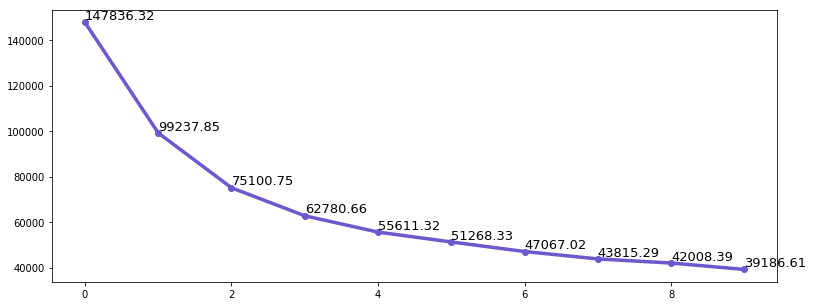

In [43]:
# plt.plot(dist1, marker='o', color='y',  linewidth = 3.5, label='Original Data')
plt.figure(figsize=(13,5))
plt.plot(dist2, marker='o', color='slateblue',  linewidth = 3.5, label='PCA-transformed Data')

# for i, label in enumerate(list(dist1.index)):
#     score = dist1.ix[label][0].round(2)
#     plt.annotate(str(score), (i, score+2),ha='left', va="bottom", size=13) 

for i, label in enumerate(list(dist2.index)):
    score = dist2.ix[label][0].round(2)
    plt.annotate(str(score), (i, score+2),ha='left', va="bottom", size=13) 
    
plt.xlim([-.5, len(dist1)])
plt.ylim([1000, 15000])
plt.xticks(range(0,11,1),fontsize=15)

ax = plt.gca()
ax.set_xticklabels(range(1,11))
plt.legend(fontsize=14)
plt.xlabel('Number of clusters',fontsize=18)
plt.ylabel('Distortion',fontsize=18)
plt.title("Inertia Values for KMeans Analyses", fontsize=22, y=1.04)

plt.axvline(0, color='black', alpha = 0.5, linewidth = 1,linestyle='--')
plt.grid(color='gray', linestyle='--', alpha=.3)
plt.show()

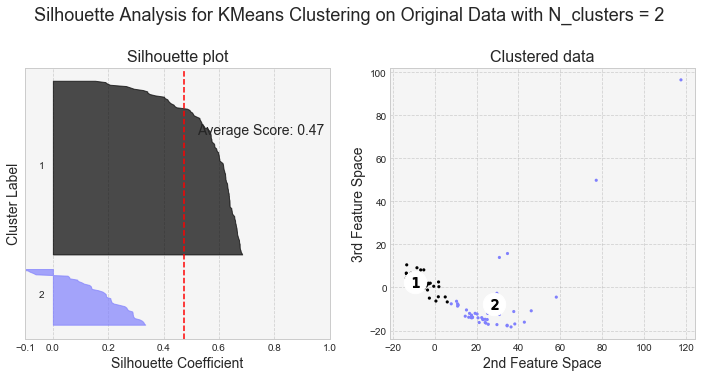

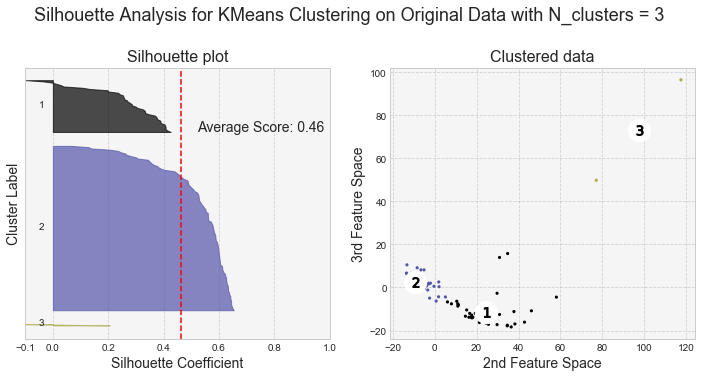

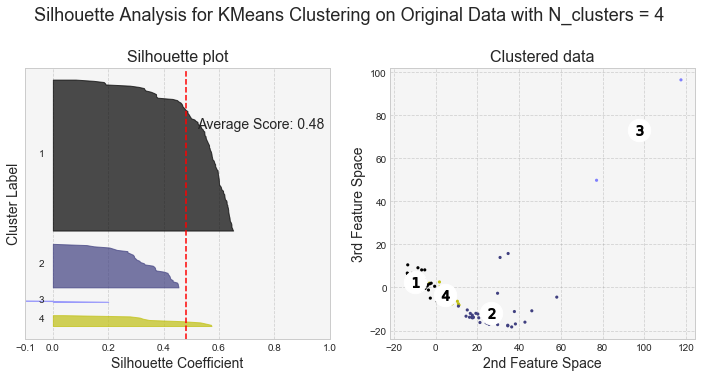

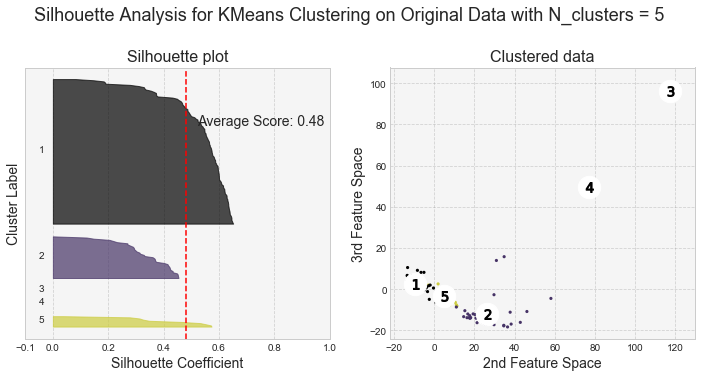

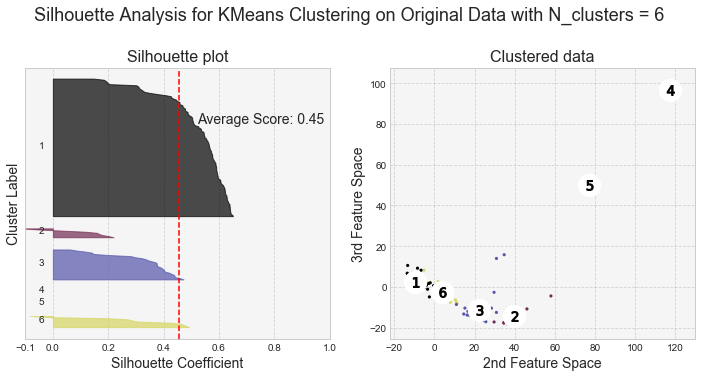

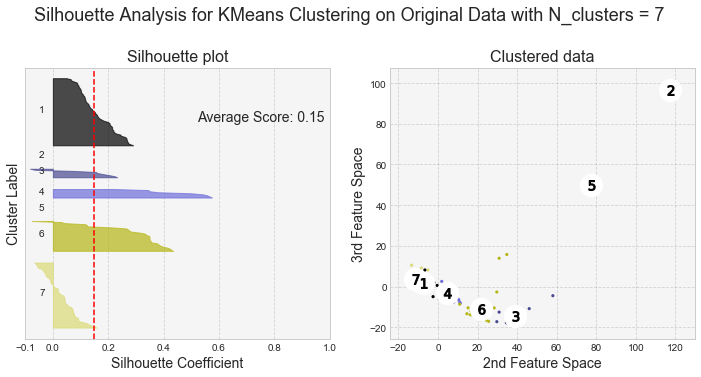

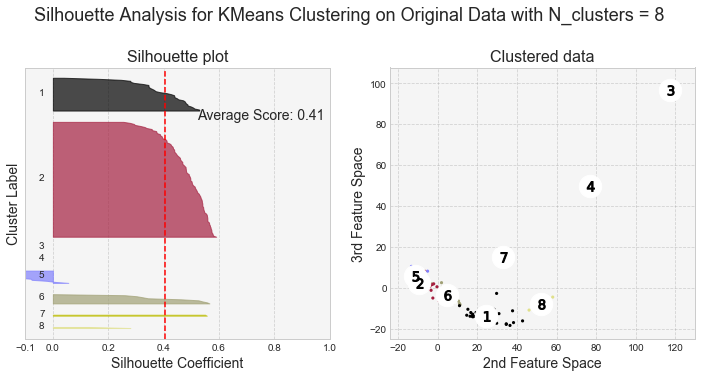

In [44]:
plt.style.use('seaborn-whitegrid')


plt.rcParams['axes.facecolor'] = 'whitesmoke'
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples,silhouette_score

X=xPC 

range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 5)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters)
    labels= clusterer.fit(X)
    cluster_labels=labels.labels_


    silhouette_avg = silhouette_score(X, cluster_labels)
    ax1.annotate('Average Score: %.2f' % silhouette_avg, xy=(1, 5), xytext=(0.52, 50),\
                 fontsize=14)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.gist_stern(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10 

    ax1.set_title("Silhouette plot",fontsize=16)
    ax1.set_xlabel("Silhouette Coefficient",fontsize=14)
    ax1.set_ylabel("Cluster Label",fontsize=14)
    

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.grid(color='gray', linestyle='--', alpha=.3)
    ax1.invert_yaxis()

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

 
    colors = plt.cm.gist_stern(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=40, lw=0,
                c=colors)
    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=500)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % (i+1), alpha=1, s=100,color='k')



    ax2.set_title("Clustered data", fontsize=16)
    ax2.set_xlabel("2nd Feature Space",fontsize=14)
    ax2.set_ylabel("3rd Feature Space",fontsize=14)
    ax2.grid(color='gray', linestyle='--', alpha=.3)

    plt.suptitle(("Silhouette Analysis for KMeans Clustering on Original Data "
                  "with N_clusters = %d" % n_clusters),
                 fontsize=18, y=1.05)

    plt.show()

In [45]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(xPC)

In [46]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:

# df2['cluster'] = pd.Series(clusters.labels_+1)
df_imp['cluster'] = pd.Series(clusters.labels_+1)

In [48]:
def colors(cluster):
    if cluster==1:
        return 'fuchsia'
    if cluster==2:
        return 'green'
    if cluster==3:
        return 'blue'
    if cluster==4:
        return 'yellow'
    else: 
        return 'k'




df_imp['color']=df_imp['cluster'].map(colors)

In [49]:
df1=df_imp[df_imp['cluster']==1]

In [50]:
df1['country']

0      AFGHANISTAN                     
2      ALGERIA                         
4      ANGOLA                          
5      ANTIGUA AND BARBUDA             
6      ARGENTINA                       
7      ARMENIA                         
10     AZERBAIJAN                      
11     BAHAMAS                         
12     BAHRAIN                         
13     BANGLADESH                      
14     BARBADOS                        
17     BELIZE                          
18     BENIN                           
19     BHUTAN                          
20     BOLIVIA                         
21     BOTSWANA                        
22     BRAZIL                          
23     BRUNEI DARUSSALAM               
25     BURKINA FASO                    
26     BURUNDI                         
27     CAMBODIA                        
28     CAMEROON                        
30     CAPE VERDE                      
31     CENTRAL AFRICAN REPUBLIC        
32     CHAD                            


In [51]:
df2=df_imp[df_imp['cluster']==2]

In [52]:
df2['country']

1      ALBANIA                   
15     BELARUS                   
24     BULGARIA                  
60     GERMAN DEMOCRATIC REPUBLIC
71     HUNGARY                   
106    MONGOLIA                  
126    POLAND                    
129    ROMANIA                   
130    RUSSIAN FEDERATION        
162    UKRAINE                   
Name: country, dtype: object

In [53]:
df2=df_imp[df_imp['cluster']==3]

df2['country']

3      ANDORRA                                  
8      AUSTRALIA                                
9      AUSTRIA                                  
16     BELGIUM                                  
29     CANADA                                   
40     CROATIA                                  
44     DENMARK                                  
52     ESTONIA                                  
55     FINLAND                                  
56     FRANCE                                   
59     GEORGIA                                  
61     GERMANY                                  
63     GREECE                                   
72     ICELAND                                  
77     IRELAND                                  
79     ITALY                                    
81     JAPAN                                    
86     LATVIA                                   
91     LIECHTENSTEIN                            
92     LITHUANIA                                
93     LUXEMBOURG   

In [54]:
# outliers=df2[df2['cluster']=='PC1']

In [55]:
df2=df_imp[df_imp['cluster']==4]

df2['country']

166    UNITED STATES
Name: country, dtype: object

In [56]:
df2=df_imp[df_imp['cluster']==5]

df2['country']

78    ISRAEL
Name: country, dtype: object

In [57]:
from sklearn.cluster import KMeans
X=xPC
kmeans = KMeans(n_clusters=5)
kmeans.fit(xPC)
y_kmeans = kmeans.predict(xPC)

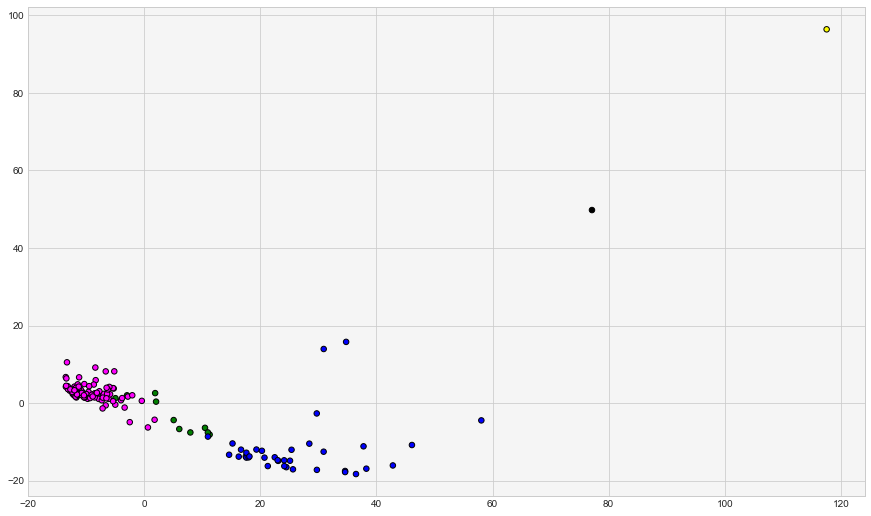

In [58]:
fig = plt.subplots(figsize=(15,9))



plt.scatter(X[:, 0], X[:, 1],s=30, c=df_imp['color'],edgecolor='k')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.1)

In [59]:
# df0=pd.merge(category, country_code, on=['coiuntry']);
# df0.info()

In [62]:
df1=pd.merge(df_imp, country_code, on=['country'])

df1['country']

0      AFGHANISTAN                              
1      ALBANIA                                  
2      ALGERIA                                  
3      ANDORRA                                  
4      ANGOLA                                   
5      ANTIGUA AND BARBUDA                      
6      ARGENTINA                                
7      ARMENIA                                  
8      AUSTRALIA                                
9      AUSTRIA                                  
10     AZERBAIJAN                               
11     BAHAMAS                                  
12     BAHRAIN                                  
13     BANGLADESH                               
14     BARBADOS                                 
15     BELARUS                                  
16     BELGIUM                                  
17     BELIZE                                   
18     BENIN                                    
19     BHUTAN                                   
20     BOLIVIA      

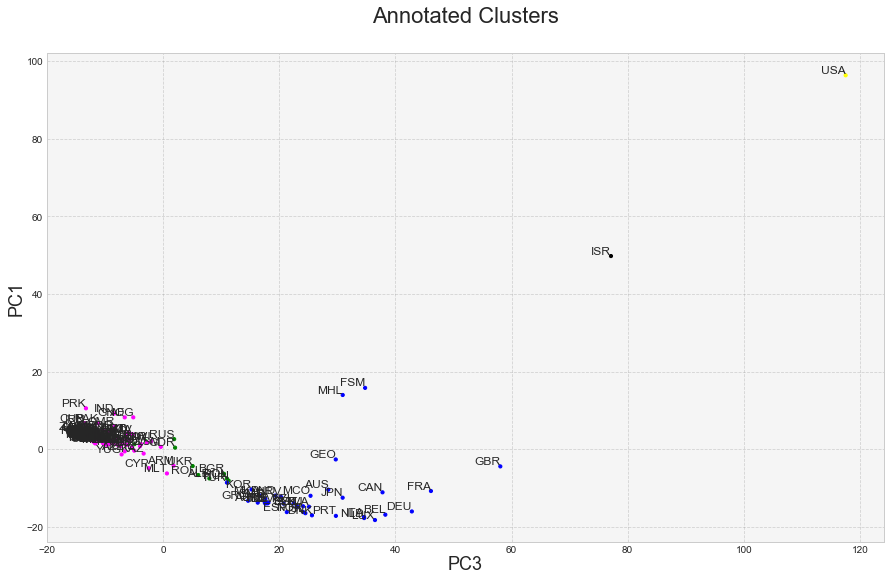

In [63]:
fig = plt.subplots(figsize=(15,9))


plt.scatter(X[:, 0], X[:, 1],s=10, c=df1['color'])
for i, country in enumerate(df1['a3']):
    plt.annotate(country, (df1.iloc[i].PC1, df1.iloc[i].PC2),fontsize=12,ha='right', va='bottom')
plt.title("Annotated Clusters", y=1.05,fontsize=22)
plt.xlabel('PC3',fontsize=18,labelpad=1)
plt.ylabel('PC1',fontsize=18,labelpad=1)
plt.grid(color='gray', linestyle='--', alpha=.3)

In [64]:
df1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,925,926,927,928,929,country,cluster,color,a2,a3
0,-5.149815,8.177256,16.104390,1.043514,3.864462,-3.599858,6.752918,-7.098129,-5.652561,12.597269,...,1.000000,1.000000,1.000000,1.000000,0.533333,AFGHANISTAN,1,fuchsia,AF,AFG
1,7.953371,-7.584580,19.749102,6.436237,-6.562336,-1.616544,-3.075582,-3.283311,3.408619,3.634681,...,1.000000,1.000000,1.000000,0.743610,1.000000,ALBANIA,2,green,AL,ALB
2,-12.808375,3.185951,1.516771,-3.046670,3.024168,-2.106743,-0.286580,-2.666415,-1.555335,2.598431,...,1.000000,1.000000,1.000000,0.717537,1.000000,ALGERIA,1,fuchsia,DZ,DZA
3,19.334553,-11.996626,-3.258778,-1.162688,-2.128694,-3.020068,-1.873942,-0.088605,2.236728,0.835399,...,0.492695,0.572747,0.658019,0.071323,1.000000,ANDORRA,3,blue,AD,AND
4,-11.633771,3.316538,4.702752,-2.078034,2.770746,-1.268366,-1.531273,2.798397,-5.682485,3.413227,...,1.000000,1.000000,1.000000,1.000000,1.000000,ANGOLA,1,fuchsia,AO,AGO
5,-9.584581,2.891833,-5.866284,1.372545,-2.095540,2.786295,-0.269833,1.164388,-0.182503,-2.501475,...,1.000000,1.000000,1.000000,0.478462,1.000000,ANTIGUA AND BARBUDA,1,fuchsia,AG,ATG
6,-3.991452,0.718432,0.070656,0.047523,0.110794,4.083480,-11.514706,6.964699,2.078125,-1.324026,...,1.000000,0.777778,1.000000,0.000000,1.000000,ARGENTINA,1,fuchsia,AR,ARG
7,1.792943,-4.309568,1.229612,-1.353894,1.285380,-2.276789,-2.890650,3.404805,0.823146,-1.457027,...,0.792053,0.900129,0.794454,0.557514,1.000000,ARMENIA,1,fuchsia,AM,ARM
8,28.442482,-10.474929,-5.335857,8.279860,-1.960855,-7.354601,7.976615,4.831627,-5.306636,4.583521,...,1.000000,0.888889,0.500000,0.000000,1.000000,AUSTRALIA,3,blue,AU,AUS
9,16.286451,-13.825899,-4.815901,2.030989,-3.741731,-8.227168,-5.095549,-0.705162,-3.524012,1.106749,...,0.000000,0.555556,0.500000,0.000000,1.000000,AUSTRIA,3,blue,AT,AUT


In [129]:
df_safe=df1[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','country','cluster']]

In [63]:
# df_safe

In [64]:
df_safe.to_csv(path_or_buf="/Users/uncontract/Documents/UN_data/UN_Resolution/PART3/pc_cluster.csv", index=False)

In [67]:
df_greg=df1[['PC1','PC2','country','a3','cluster']]




,PC1,PC2,country,a3,cluster
0,-5.149815,8.177256,AFGHANISTAN,AFG,1
1,7.953371,-7.584580,ALBANIA,ALB,2
2,-12.808375,3.185951,ALGERIA,DZA,1
3,19.334553,-11.996626,ANDORRA,AND,3
4,-11.633771,3.316538,ANGOLA,AGO,1
5,-9.584581,2.891833,ANTIGUA AND BARBUDA,ATG,1
6,-3.991452,0.718432,ARGENTINA,ARG,1
7,1.792943,-4.309568,ARMENIA,ARM,1
8,28.442482,-10.474929,AUSTRALIA,AUS,3
9,16.286451,-13.825899,AUSTRIA,AUT,3


In [68]:
df_greg.to_csv(path_or_buf="/Users/uncontract/Documents/UN_data/UN_Resolution/PART3/data_frame_greg2.csv", index=False)